# <center>Arpita Jena</center>

## Cars Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Load the data set.

In [2]:
cars = pd.read_csv("cars.csv")

In [3]:
subset = cars[(cars["Make"] == "Audi") |\
              (cars["Make"] == "Mercedes")| (cars["Make"] == "BMW") |\
              (cars["Make"] == "Land Rover")] 

In [4]:
cars.head(5)

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
0,18,Automatic transmission,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,Gasoline,140,25,250,False,2009 Audi A3 3.2,143,Audi,2009 Audi A3,6,236,6 Speed Automatic Select Shift,202,2009
1,22,Automatic transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T AT,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
2,21,Manual transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,30,200,False,2009 Audi A3 2.0 T,143,Audi,2009 Audi A3,6,207,6 Speed Manual,202,2009
3,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
4,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009




## 1. Bar plot

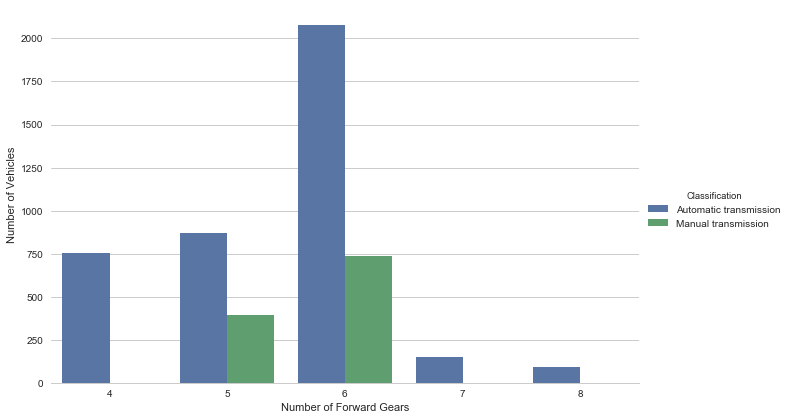

In [5]:
sns.set(style="whitegrid") 
g = sns.factorplot(x="Number of Forward Gears", data=cars, hue = "Classification", kind="count",
                    size=6, aspect=1.5)


g.despine(left = True)
g.set_ylabels("Number of Vehicles")
plt.show()
g.savefig('bar_plot.png')

From the above plot, it is evident that maximum cars have 6 forward gears. Manual transmission cars only have 5 or 6 gears and over all the number of cars having manual transmission is very low.

## 2. Histogram

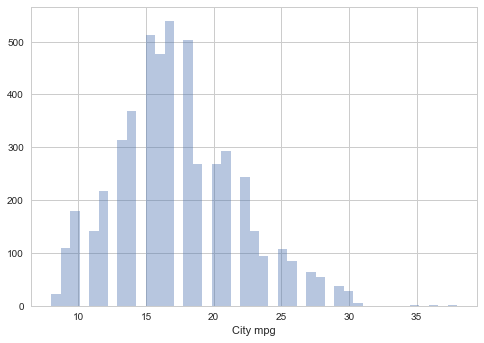

In [6]:
g = sns.distplot(cars["City mpg"], kde=False)
fig = g.get_figure()
fig.savefig('histogram.png')
plt.show()

The distribution of cars in terms of City mpg seems to be positively skewed. Maximum number of vehicles have mpg between 15-20.

## 2. Box plot

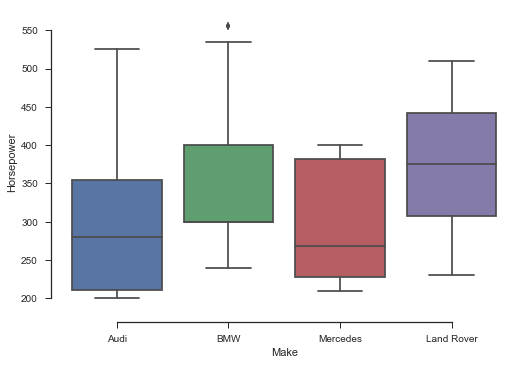

In [7]:
sns.set(style = "ticks")
g = sns.boxplot(x="Make", y = "Horsepower", data = subset)
sns.despine(offset = 10, trim = True)
fig = g.get_figure()
fig.savefig('box_plot.png')
plt.show()

BMW and LandRover make cars with higer horsepower, while Audi and Mercedes make cars of lower horsepower. Audi and BMW  make cars of horsepower with higher variation, but BMW does not make much variation in the horsepower of its cars.

## 3. Bivariate scatter plot

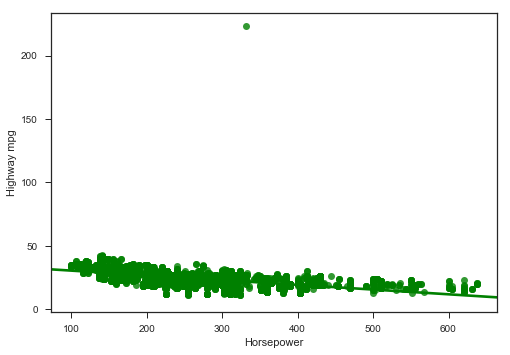

In [8]:
g = sns.regplot(x=cars["Horsepower"], y=cars["Highway mpg"], color="g")
fig = g.get_figure()
fig.savefig('bi_scatter_plot_1.png')
plt.show()

On a high level, horsepower and highway mpg seem to be inversely proportional. Let's have a closer look in the next plot

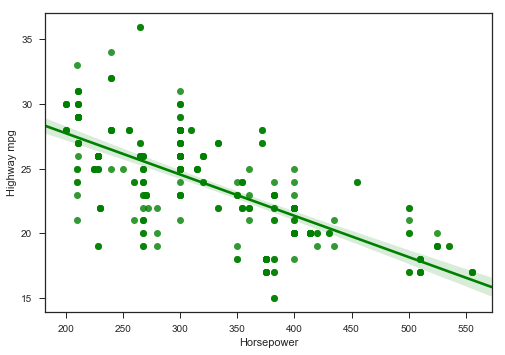

In [9]:
g = sns.regplot(x=subset["Horsepower"], y=subset["Highway mpg"], color="g")
fig = g.get_figure()
fig.savefig('bi_scatter_plot_2.png')
plt.show()

But taking a subset of data clearly shows that the relationship is not very clear. For example cars having horsepower of 270 and 525 have same Highway mpg of 20. Similarly, horsepower of 300 can have mpg between 20 to 30. So, we cannot make any solid conclusion.

## 4. Multivariate scatterplot

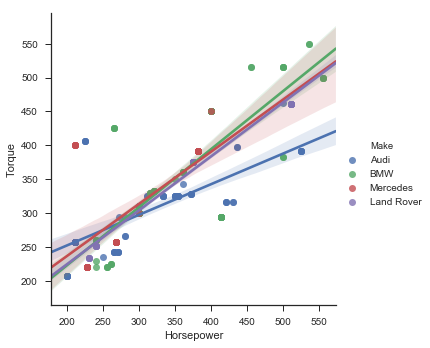

In [10]:
g = sns.lmplot(x = "Horsepower", y="Torque", hue = "Make", data = subset)
g.savefig('multi_scatter_plot.png')
plt.show()

For Audi torque doesn't increase as much as horsepower as compared to other cars.

## 5. Swarmplot

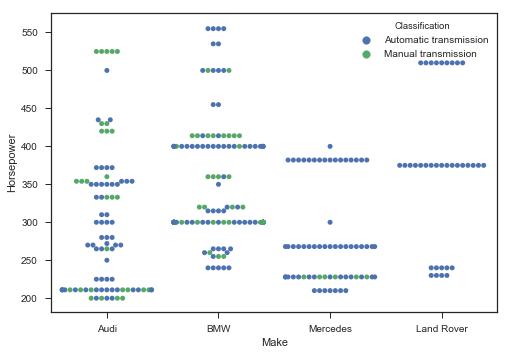

In [11]:
g = sns.swarmplot(x = "Make", y = "Horsepower", data = subset, hue = "Classification")
fig = g.get_figure()
fig.savefig('swarm_plot.png')
plt.show()

Landrover has no vehicles with manual transmission. Mrecedes manufactures a few manually transmitted vechicles with very low horse power. Audi and BMW both make a comparable number of automatic and manually transmitted vehicles. In these 4 brands if one wants to buy a vehicle with high horsepower and with manual transmission then it is Audi but with automatic transmission it will be BMW.

## 6. Faceted histogram

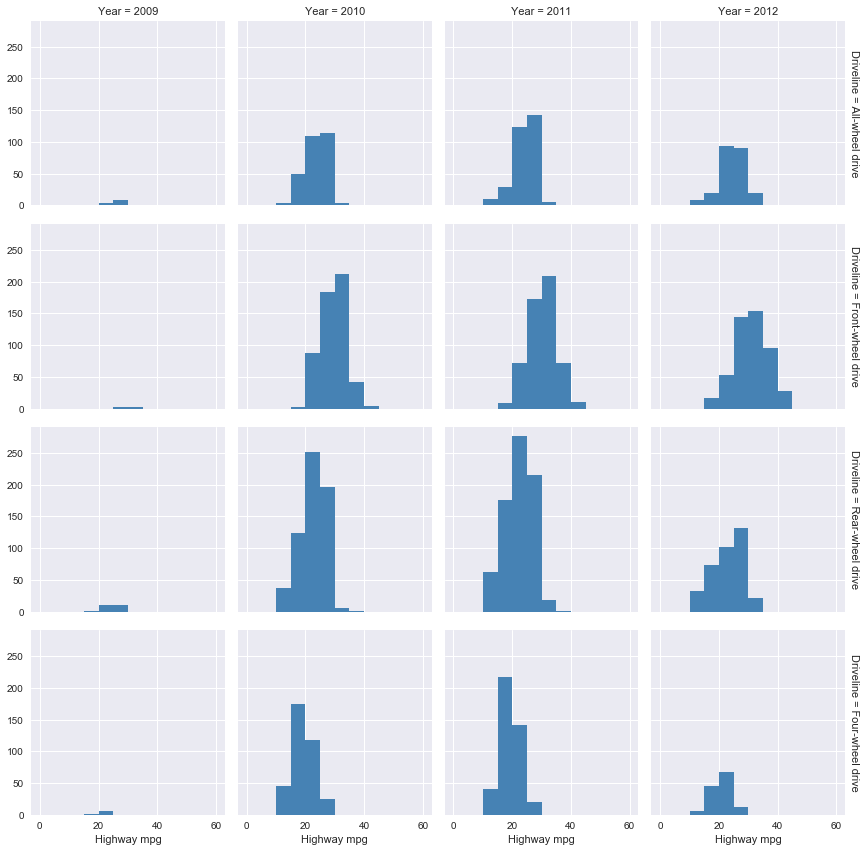

In [12]:
sns.set(style="darkgrid")
g = sns.FacetGrid(cars, row="Driveline", col="Year", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "Highway mpg", color="steelblue", bins=bins, lw=0)
g.savefig('facet_grid.png')
plt.show() 

In 2010 and 2011 the cars having highest highway mpg have Rear-wheel driveline.

## Violin plot

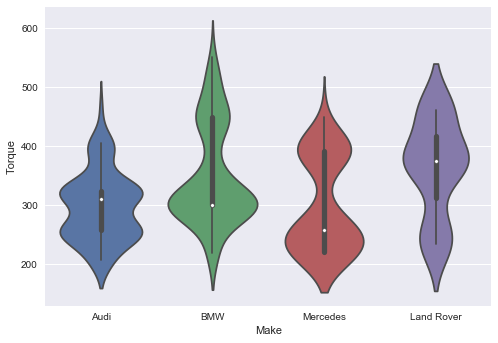

In [13]:
ax = sns.violinplot(x="Make", y="Torque", data=subset)
fig = ax.get_figure()
fig.savefig('violin_plot.png')
plt.show()

Audi and BMW have most of the cars with torque around 300. Whereas mercedes on an average makes cars with lower torque i.e. between 200 to 250 and maximum Landrover cars have torque around 400.

## Joint plot

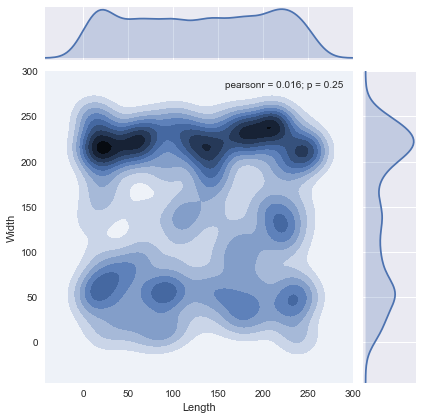

In [14]:
g = sns.jointplot(x="Length", y="Width", data=cars, kind="kde")
g.savefig('joint_plot.png')
plt.show()

There is more variation around length of cars as compared to width. Generally, most of the cars have width between 200 to 250.

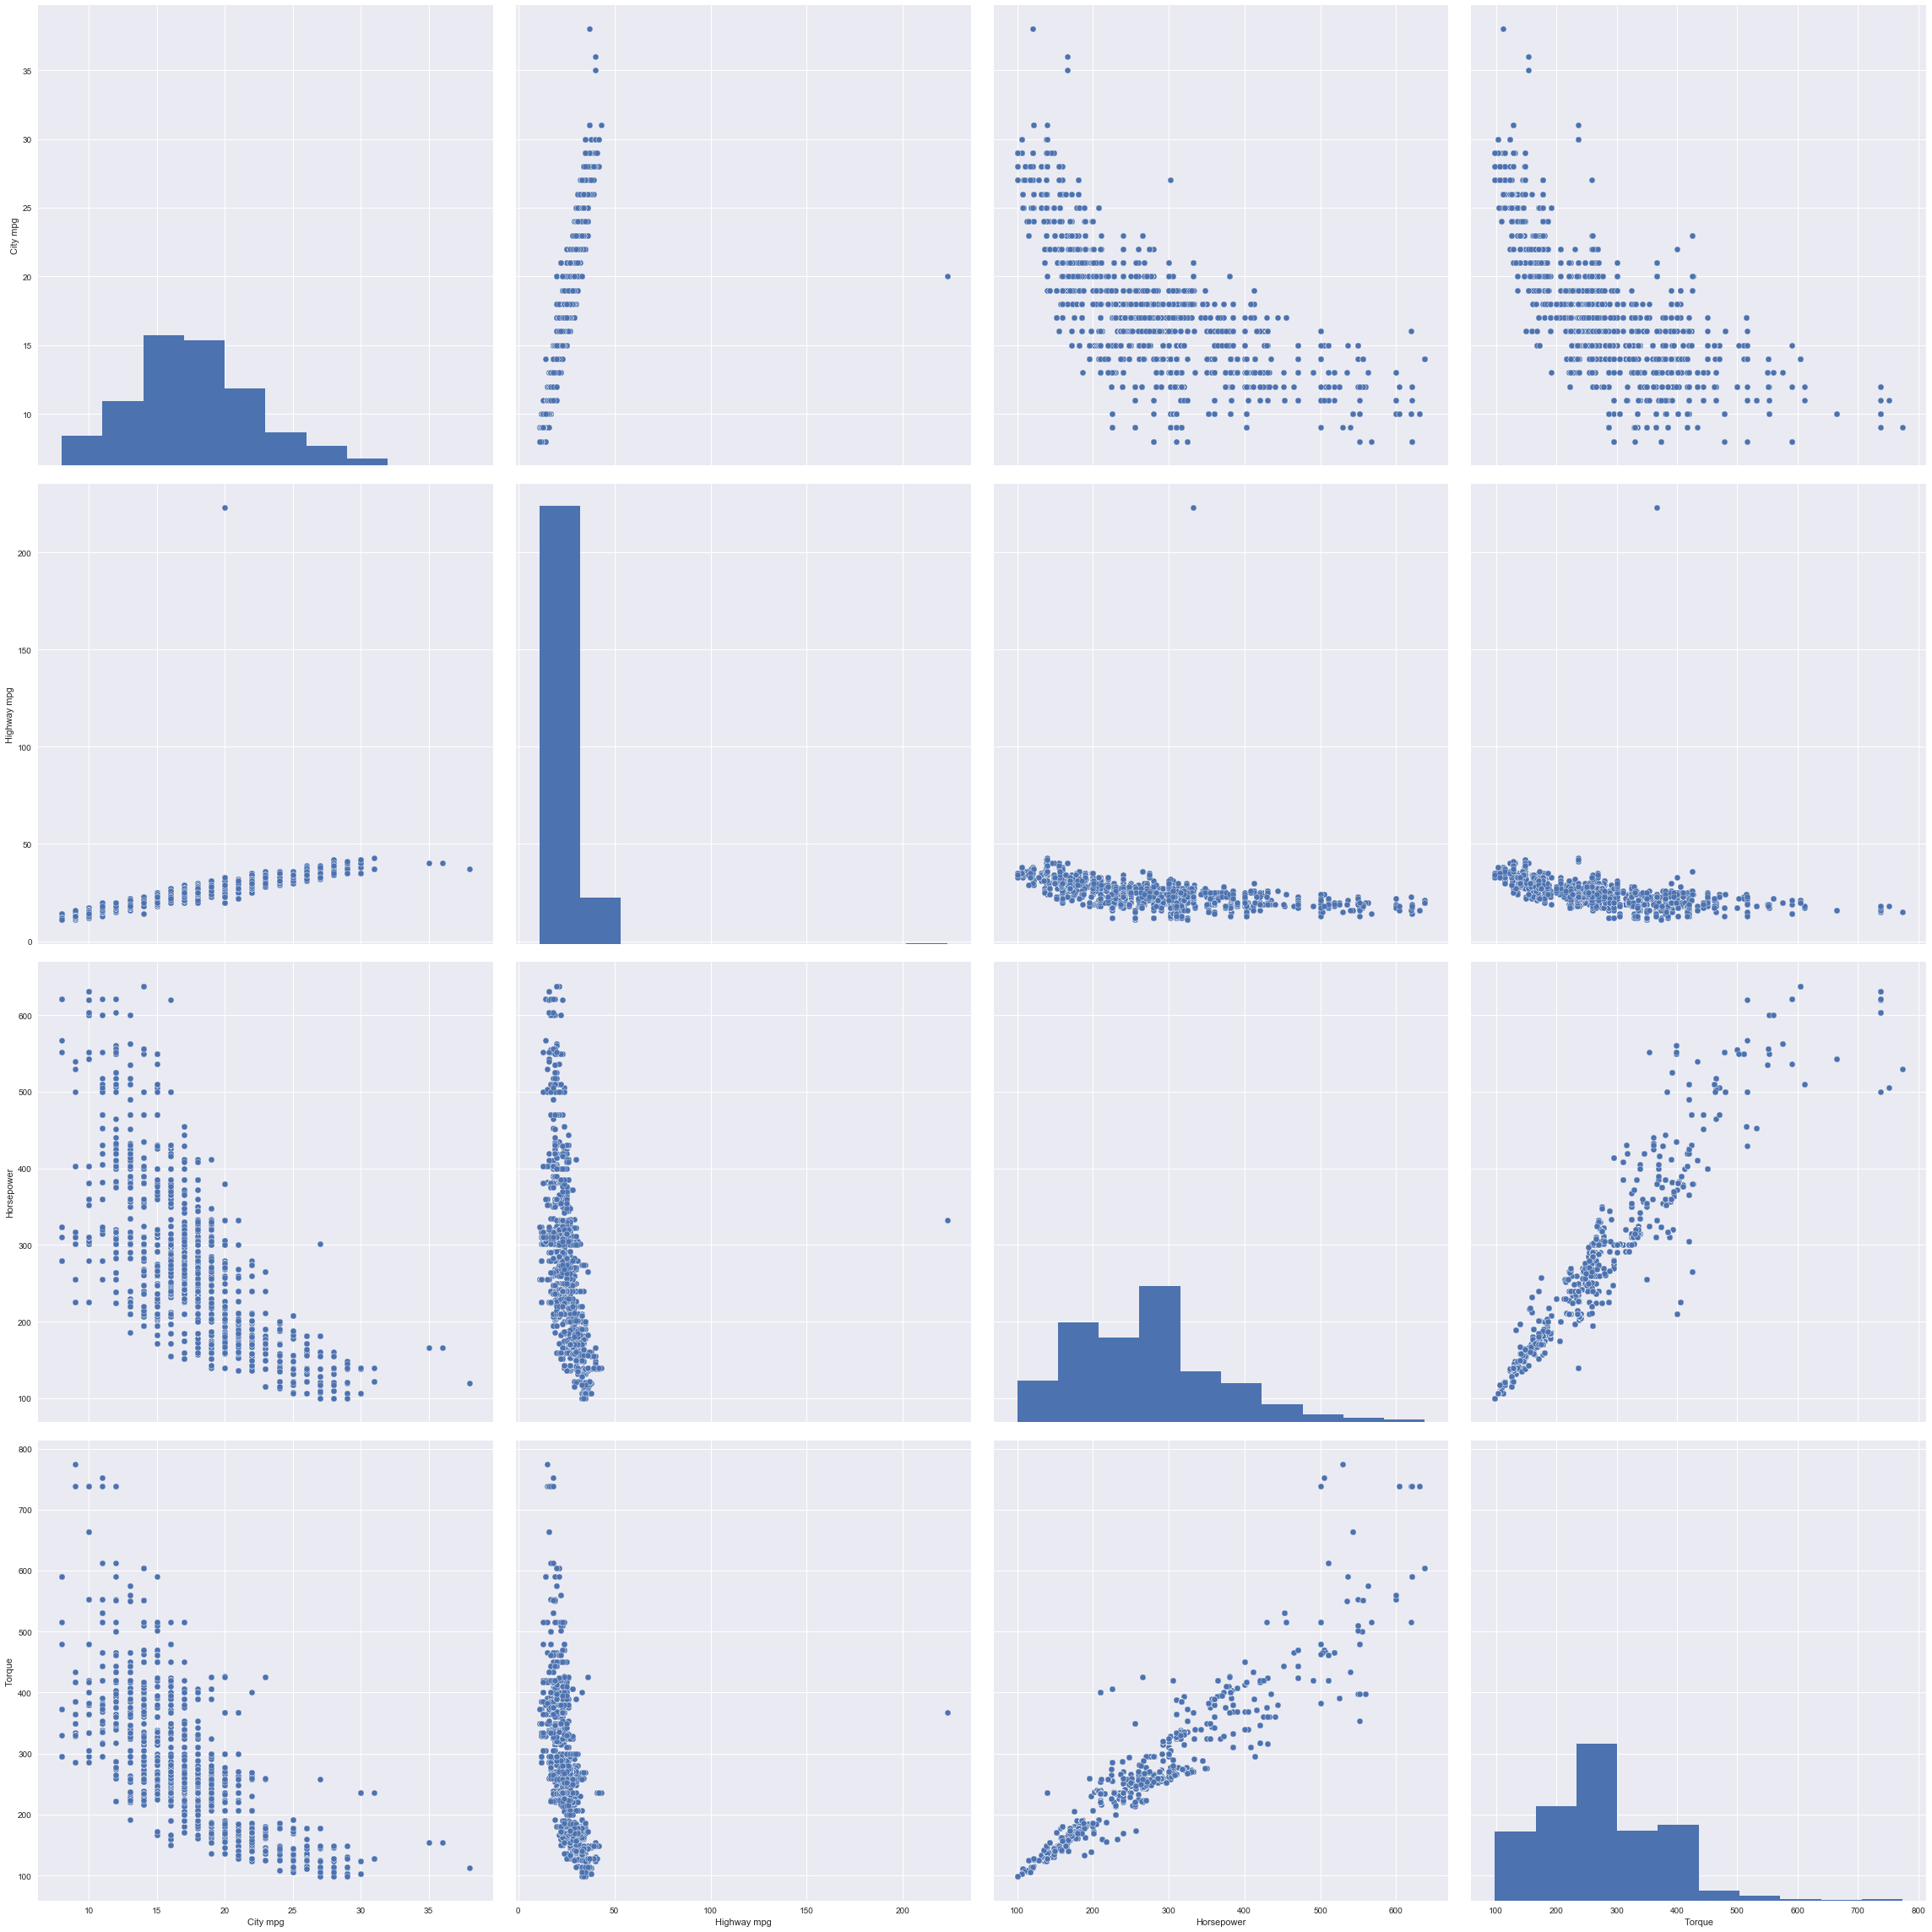

In [15]:
g = sns.pairplot(cars[["City mpg", "Highway mpg", "Horsepower", "Torque"]], size = 8)
g.savefig('pair_plot.png')
plt.show()

Horsepower and Torque have a almost liner relationship. Highway seem almost unrelated or has very low variation as compared to Horsepower and Torque. 